In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

In [2]:
data = pd.read_csv(r"D:\Flothers\URL malware recognizer --agent\data\data_with_features.csv")
data.head()

,url,label,url_length,domain_length,path_length,is_IP,num_sub_domains,contains_hexadecimal,entropy,count_num_domain_extension,...,is#,is+,ishttp,ishttps,is.com,iswww.,is.org,is&,is;,is~
0,vitalrecordsus.com/kentucky-jefferson-county.html,0,49,0,0,0,1,0,4.287780,3,...,0,0,0,0,1,0,0,0,0,0
1,http://atwiki.jp/wiki/%E3%83%90%E3%82%A4%E3%82...,0,145,9,128,0,2,1,3.645643,2,...,0,0,1,0,0,0,0,0,0,0
2,https://www.legacy.com/obituaries/orlandosenti...,0,114,14,91,0,3,0,4.878643,3,...,0,0,1,1,1,1,0,1,0,0
3,http://192.3.251.44/arm7,1,24,12,4,1,1,0,3.855389,-1,...,0,0,1,0,0,0,0,0,0,0
4,https://www.molsoncoorssettlement.com/,0,38,29,0,0,1,0,3.715327,3,...,0,0,1,1,1,1,0,0,0,0


In [3]:
numerical_cols = data.select_dtypes(include=["number"]).columns
dataset = data[numerical_cols]
X = dataset.drop(columns="label")
y = dataset["label"]

In [4]:
def get_numerical_non_binary_columns(X):
    numerical_cols = X.select_dtypes(include=["number"]).columns
    non_binary_numerical_cols = [col for col in numerical_cols if X[col].nunique() > 2]
    return non_binary_numerical_cols

non_binary_numerical_columns = get_numerical_non_binary_columns(X)
print((non_binary_numerical_columns))

['url_length', 'domain_length', 'path_length', 'num_sub_domains', 'entropy', 'count_num_domain_extension', 'digits_count', 'alpha_count', 'special_chars_count', 'num_params', 'num_subdomains', 'num-', 'num=', 'num.', 'num%', 'num//', 'num_', 'num/']


In [7]:
scaler = StandardScaler()

X[non_binary_numerical_columns] = X[non_binary_numerical_columns].astype(float)
X[non_binary_numerical_columns] = scaler.fit_transform(X[non_binary_numerical_columns])
X.head()

,url_length,domain_length,path_length,is_IP,num_sub_domains,contains_hexadecimal,entropy,count_num_domain_extension,is_port,digits_count,...,is#,is+,ishttp,ishttps,is.com,iswww.,is.org,is&,is;,is~
0,-0.170766,-1.243416,-0.509819,0,-0.783851,0,0.119462,0.433220,0,-0.480834,...,0,0,0,0,1,0,0,0,0,0
1,1.633889,-0.524778,1.955767,0,-0.143351,1,-1.512703,-0.436514,0,4.113457,...,0,0,1,0,0,0,0,0,0,0
2,1.051136,-0.125534,1.243059,0,0.497149,0,1.621300,0.433220,0,0.646067,...,0,0,1,1,1,1,0,1,0,0
3,-0.640728,-0.285231,-0.432770,1,-0.783851,0,-0.979578,-3.045717,0,0.386013,...,0,0,1,0,0,0,0,0,0,0
4,-0.377549,1.072197,-0.509819,0,-0.783851,0,-1.335583,0.433220,0,-0.480834,...,0,0,1,1,1,1,0,0,0,0


In [ ]:
# joblib.dump(scaler, r"D:\Flothers\URL malware recognizer --agent\models\scaler_v1.pkl")

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [21]:
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9814778794434631
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    155086
           1       0.98      0.97      0.98     96829

    accuracy                           0.98    251915
   macro avg       0.98      0.98      0.98    251915
weighted avg       0.98      0.98      0.98    251915



In [22]:
conf_matrix = confusion_matrix(ytest, y_pred)
conf_matrix

array([[153526,   1560],
       [  3106,  93723]])

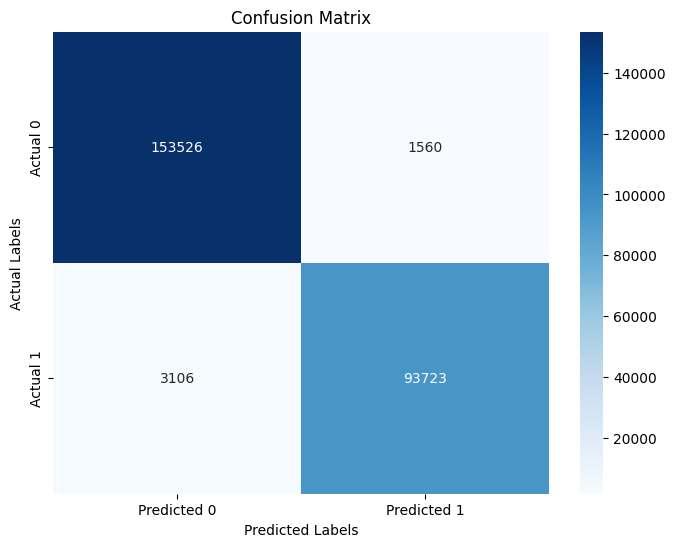

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

# Confusion matrix
confusion_matrix = np.array([[153526, 1560], [3106, 93723]])

# Extract values
TP = confusion_matrix[0, 0]
FN = confusion_matrix[0, 1]
FP = confusion_matrix[1, 0]
TN = confusion_matrix[1, 1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)

accuracy, precision, recall, f1_score, specificity

In [25]:
xgb_model = XGBClassifier(eval_metric='logloss')

param_dist = {
    'n_estimators': randint(80, 200),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10),
    'gamma': uniform(0, 0.5),
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=1)
random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.4853571532049581, max_depth=5, n_estimators=151; total time=   3.9s
[CV] END gamma=0.18727005942368125, learning_rate=0.4853571532049581, max_depth=5, n_estimators=151; total time=   4.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.4853571532049581, max_depth=5, n_estimators=151; total time=   4.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.4853571532049581, max_depth=5, n_estimators=151; total time=   3.9s
[CV] END gamma=0.18727005942368125, learning_rate=0.4853571532049581, max_depth=5, n_estimators=151; total time=   3.9s
[CV] END gamma=0.2993292420985183, learning_rate=0.08800932022121825, max_depth=5, n_estimators=166; total time=   4.3s
[CV] END gamma=0.2993292420985183, learning_rate=0.08800932022121825, max_depth=5, n_estimators=166; total time=   4.4s
[CV] END gamma=0.2993292420985183, learning_rate=0.08800932022121825, max_depth=5, n_estimators=166;

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002BBA44B36D0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002BBA44B0290>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BBA44B1B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BBA44B2990>},
                   random_state=42, scoring='accuracy', verbose=2)

In [29]:
best_params = random_search.best_params_
final_xgb_model = XGBClassifier(**best_params, eval_metric='logloss')
final_xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=np.float64(0.02904180608409973),
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.4430880728874676), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=183, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
ypred = final_xgb_model.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)
accuracy = accuracy_score(ytest, y_pred)

In [39]:
print("Best Parameters:", best_params)

Best Parameters: {'gamma': np.float64(0.02904180608409973), 'learning_rate': np.float64(0.4430880728874676), 'max_depth': 6, 'n_estimators': 183}


In [40]:
print("\nClassification Report:\n", class_report)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    155086
           1       0.98      0.97      0.98     96829

    accuracy                           0.98    251915
   macro avg       0.98      0.98      0.98    251915
weighted avg       0.98      0.98      0.98    251915

Accuracy: 0.9814778794434631


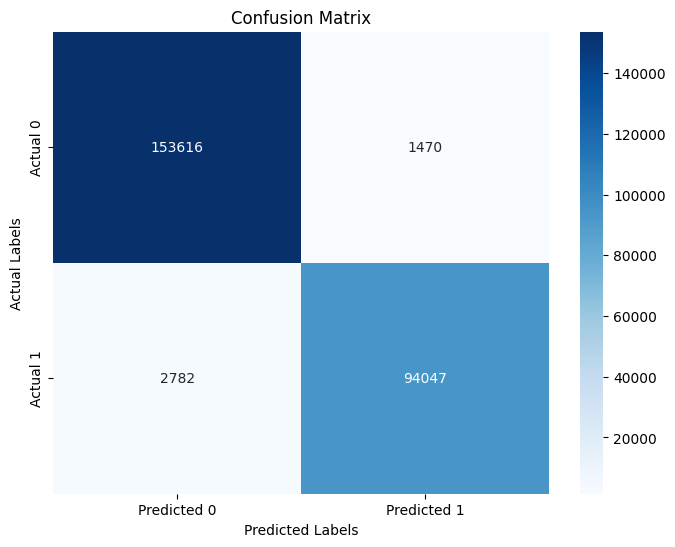

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
final_xgb_model.save_model(r"D:\Flothers\URL malware recognizer --agent\models\xgb_model_v4.ubj")